In [36]:
import importlib
import sys

# sys.path.append('home/elias/Genetic-Algorithms/energy optimization/') #Fix this

from pprint import pprint
import numpy as np
from deap import base, creator, tools
import random

import system.GA as GA
 
import datalayer.getdata as getdata
import system.system_ as sys
import system.constraints as constraints

importlib.reload(sys)
importlib.reload(GA)
importlib.reload(getdata)
importlib.reload(constraints)



state = getdata.gen_state()
LOWER_BOUNDS, UPPER_BOUNDS, constraint = constraints.general_constraints(Glmax=max(state["load"]))

[Dmax, Glmax, Gbmax, Bmax, N_HOURS] = constraint

genome=96

In [37]:
test = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)
print(test)


[0.00000000e+00 1.82424822e+01 2.02948912e+01 2.41319166e+01
 5.99673593e+00 2.15974717e+01 2.47348886e+01 2.41913290e+00
 1.00811147e+01 2.16290262e+01 1.50274927e+01 1.41504283e+01
 2.50249842e+01 2.83683398e+01 2.05743135e+01 2.51015894e+01
 2.06347006e+01 2.49192304e+01 2.23777626e+01 1.14102886e+01
 5.71745084e+00 9.19789093e+00 5.80836592e+00 1.53908006e+01
 5.83252290e+01 3.85338694e+01 3.55416094e+01 3.10152704e+01
 4.95273329e+01 3.63618714e+01 3.89246386e+01 6.51986851e+01
 5.89325869e+01 4.71462837e+01 5.34011922e+01 5.39623934e+01
 4.27463035e+01 3.83605526e+01 4.58674252e+01 4.18964393e+01
 4.84109254e+01 4.48351966e+01 4.59044940e+01 5.48629537e+01
 5.84011116e+01 5.29359700e+01 5.44824712e+01 4.28154200e+01
 1.52384149e+01 3.53455948e+00 2.55678727e+00 5.60765897e+00
 1.91800103e+00 1.82203672e+01 4.79650594e+00 1.72155325e+01
 6.39071574e+00 1.01101549e+01 1.69700909e+01 1.79470296e+01
 1.85606631e+01 1.61185541e+01 1.00226074e+01 1.24918399e+00
 1.04730383e+01 9.918115

In [38]:
test = GA.create_population(2,96, LOWER_BOUNDS, UPPER_BOUNDS)
print(test)

[[0.00000000e+00 1.03057640e+01 7.64236067e+00 9.82240697e+00
  1.83976999e+01 2.03046536e+01 8.44001578e+00 8.88515045e+00
  6.73777300e+00 1.06657760e+01 1.64401309e+01 2.11889886e+01
  2.54815911e+01 2.10434025e+01 1.28397808e+01 1.02809698e+01
  2.16620417e+01 3.00000000e+01 2.55143475e+01 1.41550270e+01
  2.35266198e+01 9.05115831e+00 1.64684037e+01 7.82241579e+00
  5.83252290e+01 4.64705876e+01 4.81941399e+01 4.53247800e+01
  3.71263689e+01 3.76546895e+01 5.52195114e+01 5.87326675e+01
  6.22759287e+01 5.81095338e+01 5.19885540e+01 4.69238330e+01
  4.22896967e+01 4.56854900e+01 5.36019579e+01 5.67170589e+01
  4.73835842e+01 3.85712016e+01 4.27679091e+01 5.21182153e+01
  4.05919427e+01 5.30827027e+01 4.38224334e+01 5.03838048e+01
  1.18789863e+01 3.16134905e+00 1.14486717e+01 8.47377973e-01
  3.21815716e-01 6.78647540e+00 9.27065337e+00 1.44677642e+01
  1.94255127e+01 1.56484458e+01 3.99080265e+00 4.09149011e+00
  9.29385274e+00 1.89468832e+01 1.71090552e+01 4.71034481e+00
  1.1071

In [39]:
state["time"] = state["time"].dt.strftime("%Y-%m-%d %H:%M")
print(state)

                time  spotprice  irradiance       load
0   2025-12-15 00:00      24.47        0.00  58.325229
1   2025-12-15 01:00      23.54        0.00  56.776352
2   2025-12-15 02:00      21.33        0.00  55.836501
3   2025-12-15 03:00      19.61        0.00  55.147187
4   2025-12-15 04:00      18.39        0.00  55.524069
5   2025-12-15 05:00      21.42        0.00  57.959343
6   2025-12-15 06:00      27.61        0.00  63.659527
7   2025-12-15 07:00      38.81        0.01  67.617818
8   2025-12-15 08:00      44.65        1.66  69.013702
9   2025-12-15 09:00      43.73       11.98  68.775310
10  2025-12-15 10:00      43.60       30.46  68.428685
11  2025-12-15 11:00      44.56       46.58  68.112822
12  2025-12-15 12:00      45.85       59.39  67.771288
13  2025-12-15 13:00      46.98       46.87  66.728892
14  2025-12-15 14:00      46.34        8.22  66.441739
15  2025-12-15 15:00      47.00        0.44  66.998029
16  2025-12-15 16:00      47.93        0.00  69.045626
17  2025-1

In [40]:
individual = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)
D, Gb, Gl, g = GA.unpack(individual)

N_HOURS = 24

B = np.zeros(N_HOURS + 1)

for t in range(N_HOURS):
    print(sys.solar_gen(t, state))
    B[t + 1] = B[t] - D[t] + g[t]*sys.solar_gen(t, state) + Gb[t]

    if not constraints.battery_constraints(t, D, B, Bmax):
        print(False)


#test = sys.battery_sim(D,Gb,g, state, Bmax=100, N_HOURS=24)

0.0
False
0.0
False
0.0
False
0.0
0.0
0.0
0.0
2.9999999999999997e-05
0.004979999999999999
0.03594
0.09137999999999999
0.13974
0.17817000000000002
0.14060999999999998
0.024660000000000005
0.00132
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [41]:



population = GA.create_population(100,96, LOWER_BOUNDS, UPPER_BOUNDS)


x_dim, y_dim = population.shape

D, Gl, Gb, g = GA.unpack(population[0,:])
print(Gl)


x = GA.fitness(population[0,:], state, LOWER_BOUNDS, UPPER_BOUNDS, constraint)

print(x)

[58.32522903 50.7908112  53.99984933 49.53707691 38.47930562 46.51245393
 52.62958356 45.9921075  39.64705177 65.39794826 60.42189534 40.79735048
 44.35428542 41.42237754 61.55601111 45.73959671 45.84547498 45.99812562
 63.50931253 46.0933817  52.34417109 57.90126723 56.31576232 49.67512391]
(np.float64(56383.00752829925),)


In [42]:
toolbox = base.Toolbox()



# Fitness: minimize cost ⇒ weight = -1.0
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Individual = list with attached fitness
creator.create("Individual", list, fitness=creator.FitnessMin)

/home/elias/.conda/envs/ga/lib/python3.14/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/elias/.conda/envs/ga/lib/python3.14/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [43]:


population_dp = [creator.Individual(ind.tolist()) for ind in population]

# Register the evaluation function
toolbox.register("evaluate", GA.fitness, state=state, LOWER_BOUNDS=LOWER_BOUNDS, UPPER_BOUNDS=UPPER_BOUNDS, constraint=constraint)


# Tournament selection (tournsize = 3 is typical)
toolbox.register("select", tools.selTournament, tournsize=3)

offspring = toolbox.select(population_dp, len(population_dp))
offspring = list(map(toolbox.clone, offspring))



In [44]:
toolbox.register("mate", tools.cxBlend, alpha=0.3)

CXPB = 0.9  # crossover probability

# Inside the GA evolution loop:
for i in range(1, len(offspring), 2):
    if random.random() < CXPB:
        toolbox.mate(offspring[i-1], offspring[i])

In [45]:
toolbox.register(
    "mutate",
    tools.mutPolynomialBounded,
    low=list(LOWER_BOUNDS),
    up=list(UPPER_BOUNDS),
    eta=20,
    indpb=0.05
)

MUTPB = 0.2

for mutant in offspring:
    if random.random() < MUTPB:
        toolbox.mutate(mutant)
        del mutant.fitness.values

In [46]:
POP_SIZE = 100
MAX_GEN = 2500

population = GA.create_population(POP_SIZE,96, LOWER_BOUNDS, UPPER_BOUNDS)
population_dp = [creator.Individual(ind.tolist()) for ind in population]
population = population_dp

pprint(population[:5])  # Print first 5 individuals to inspect


[[0.0,
  18.747417914159897,
  4.176398286476972,
  8.430122759212564,
  6.706413693404282,
  23.669546618092824,
  17.46830051559763,
  15.908003288454216,
  28.4301955942154,
  10.62215522191763,
  26.457148478188014,
  1.92152490222896,
  24.91135031999385,
  19.840180373465273,
  28.704832854262367,
  10.84992751147752,
  25.684706002781407,
  9.295971569588502,
  27.73024081902936,
  9.108675214839629,
  27.083193971143256,
  20.343264684785574,
  6.4944929884770515,
  9.089899754290563,
  58.325229033333336,
  38.0289336233401,
  51.66010227185636,
  46.71706422412077,
  48.81765513576239,
  34.289796481907175,
  46.19122663856904,
  51.709814699045786,
  40.58350606411793,
  58.15315462808237,
  41.97153637597866,
  66.19129675610436,
  42.85993746750615,
  46.8887120682014,
  37.73690589573763,
  56.14810117185581,
  43.360919913885255,
  60.45845546791149,
  40.552015789303965,
  57.16456706432704,
  37.03536850802341,
  41.79059628188109,
  53.79634413235628,
  49.11632084570

In [ ]:
fitness_history = []

for gen in range(MAX_GEN):

    # --- SELECTION ---
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # --- CROSSOVER ---
    for i in range(1, len(offspring), 2):
        if random.random() < CXPB:
            toolbox.mate(offspring[i-1], offspring[i])
            del offspring[i-1].fitness.values
            del offspring[i].fitness.values

    # --- MUTATION ---
    for ind in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(ind)
            del ind.fitness.values

    # --- EVALUATE IF NEEDED ---
    invalid = [ind for ind in offspring if not ind.fitness.valid]
    for ind in invalid:
        ind.fitness.values = toolbox.evaluate(ind)

    # --- ELITIST REPLACEMENT (μ + λ) ---
    population = tools.selBest(population + offspring, POP_SIZE)

    best = tools.selBest(population, 1)[0]
    best_fitness = best.fitness.values[0]
    fitness_history.append(best_fitness)

    # print progress
    print(f"Gen {gen}: Best = {best_fitness}")


Gen 0: Best = 55688.199915117664
Gen 1: Best = 55688.199915117664
Gen 2: Best = 55688.199915117664
Gen 3: Best = 55688.199915117664
Gen 4: Best = 55688.199915117664
Gen 5: Best = 55688.199915117664
Gen 6: Best = 55688.199915117664
Gen 7: Best = 55662.32550846526
Gen 8: Best = 55662.32550846526
Gen 9: Best = 55662.32550846526
Gen 10: Best = 55656.97204798621
Gen 11: Best = 55603.60860564803
Gen 12: Best = 55603.60860564803
Gen 13: Best = 55603.60860564803
Gen 14: Best = 55603.60860564803
Gen 15: Best = 55587.57126774748
Gen 16: Best = 55587.05970888314
Gen 17: Best = 55544.43264998337
Gen 18: Best = 55540.75222824868
Gen 19: Best = 55527.323311308865
Gen 20: Best = 55516.96850698006
Gen 21: Best = 55495.99343123865
Gen 22: Best = 55470.64329129271
Gen 23: Best = 55428.955657092214
Gen 24: Best = 55328.47944156505
Gen 25: Best = 55328.47944156505
Gen 26: Best = 55214.74748870015
Gen 27: Best = 55183.009975115725
Gen 28: Best = 55133.792236255096
Gen 29: Best = 55122.78302982366
Gen 30: B

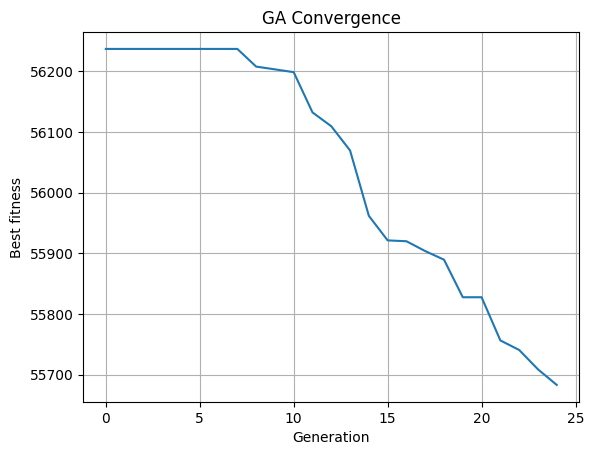

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best fitness")
plt.title("GA Convergence")
plt.grid(True)
plt.show()

In [ ]:
best = tools.selBest(population, 1)[0]
def extract_variables(best_individual):
    D     = np.array(best_individual[0:N_HOURS])
    Gb    = np.array(best_individual[N_HOURS:2*N_HOURS])
    Gl    = np.array(best_individual[2*N_HOURS:3*N_HOURS])
    gamma = np.array(best_individual[3*N_HOURS:4*N_HOURS])
    return D, Gl, Gb, gamma

D_opt, Gb_opt, Gl_opt, gamma_opt = extract_variables(best)

print("Optimal Battery Discharge D(t):", D_opt)
print("Optimal Grid-to-Load Gl(t):", Gl_opt)
print("Optimal Grid-to-Battery Gb(t):", Gb_opt)
print("Optimal Renewable Fraction γ(t):", gamma_opt)



Optimal Battery Discharge D(t): [ 0.          4.66967284 22.36684624  8.20323132 24.46330814 17.86705673
  5.91556476 17.98085305 29.65454361  3.69318477  7.91768565  7.11794928
  1.2039407  29.70610438 16.96895493  9.92379217 24.27339608 23.77182061
 25.5998795   4.40856016  3.90967869 10.33224841 19.25255323 24.2360633 ]
Optimal Grid-to-Load Gl(t): [58.32522903 52.1235131  33.46965432 46.94574204 31.17366982 40.09228637
 57.69269371 49.63696493 39.35915805 65.06693411 60.5109992  60.99487238
 66.57842198 37.02278806 49.47278382 57.07423651 44.77222984 45.98260642
 42.65522257 61.75312733 60.20888379 51.81372869 41.03960122 33.19458792]
Optimal Grid-to-Battery Gb(t): [ 3.30582867 11.67494334  8.70147453  4.19245785  3.41301479 19.84194103
 10.29024791  9.04113843 10.56362635 17.82019258 10.38750196 10.25241785
 15.80053711 15.44644399  0.88798412  3.10423429  9.25710613 15.67335364
  0.1083249   6.21917382 15.66297419  0.28261279  0.50238956  1.36048772]
Optimal Renewable Fraction γ(t

In [ ]:

importlib.reload(GA)

print(GA.fitness(np.concatenate([D_opt, Gl_opt, Gb_opt, gamma_opt]), state, LOWER_BOUNDS, UPPER_BOUNDS, constraint))


indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)

D, Gl, Gb, g = GA.unpack(indi)

print(D)
print(Gb)


def battery_sim(D,Gb,g, state, B_0=0, Bmax=100, N_HOURS=24):
    B = np.zeros(N_HOURS + 1)
    B[0] = B_0

    for t in range(N_HOURS):
        B[t + 1] = B[t] - D[t] + g[t]*sys.solar_gen(t, state) + Gb[t]
        
        if (B[t + 1] > Bmax):
            B[t + 1] = Bmax

        if (B[t] < D[t] or B[t] > Bmax):
            return False, B
        

    return True, B

print(battery_sim(D, Gl, g, state))

(np.float64(55683.123200472226),)
[ 0.         13.62675827  5.13899245 24.03081152 14.31439976 11.5093387
  5.20312604 23.24138902 12.1375973  21.69049059 28.73387955 19.31847633
 15.77924604  8.21101595 20.54654134 14.56968885 16.74249395 10.10179533
 25.99906495 12.55127333 25.56006702 10.57765086 18.63367941  3.87110919]
[11.99917444  7.42841462 11.90664884  9.64718631 12.53839479 12.875131
  6.51838455  4.75021859 18.6237094  19.17250404  3.90978666 18.8158987
  0.95042463  7.95145857  6.98252157  4.76319563  2.15949968 17.51025551
 19.96699587 18.00417043  7.253187    8.91539868 11.97480154  3.76097164]
(True, array([  0.        ,  58.32522903,  87.84806404, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,

In [ ]:
t = 0

indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)



D, Gl, Gb, g = GA.unpack(indi)

print(D)
print(Gl)
#print(state["load"])

def load_constraints(t, D, Gl, state):
    # Load (t) = Gl(t) + D(t)
    # print(Gl[t] + D[t] - state["load"].iloc[t])
    return abs(Gl[t] + D[t] - state["load"].iloc[t]) < 1

for t in range(len(D_opt)):

    if not load_constraints(t, D, Gl, state):
        print(False)
    



load = state["load"].iloc[t]
print(load)



[ 0.         19.30165321 11.62578127 11.62002762 20.89548805 14.15824569
 13.44426274  3.15443546  6.89883401 20.41193049  3.37883995  4.22605238
 11.07847057 27.84021876 17.54144747  2.65456122 30.         25.6012074
  5.38677309 24.55358813 16.5102852  12.7240453  26.99280695 23.05889545]
[58.32522903 37.47469833 44.21071929 43.52715937 34.62858078 43.80109741
 50.21526442 64.46338253 62.11486765 48.36337936 65.0498449  63.88676927
 56.69281722 38.88867368 48.90029128 64.34346746 38.43124512 44.15321963
 62.89548352 41.71965415 47.60827728 49.40981567 33.29803017 35.14732515]
58.2062206


In [ ]:
importlib.reload(GA)

indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)

# print(GA.fitness(individual, state, LOWER_BOUNDS, UPPER_BOUNDS, constraint))


D, Gl, Gb, g = GA.unpack(indi)

print(D)
print(Gl)

for t in range(len(D_opt)):

    if not load_constraints(t, D, Gl, state):
        print(False)
    else:
        print(True)



[ 0.         22.09255976 19.32023531 19.48655824  5.55860687 16.04961192
 21.62189286 29.55310233  2.77987735  5.95776641 16.22994816 13.05424437
 10.88483343 27.48377608 26.28558153 13.96141353 16.17514991 21.87774105
  7.59508385  8.4236551   2.85819663  8.59279527  1.34614767 18.61677188]
[58.32522903 34.68379177 36.51626525 35.66062875 49.96546196 41.90973118
 42.03763429 38.06471566 66.23382431 62.81754344 52.1987367  55.05857729
 56.88645436 39.24511636 40.15615722 53.03661515 52.87047601 47.87668599
 60.68717276 57.84958718 61.26036585 53.5410657  58.94468945 39.58944872]
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
